In [1]:
import pandas as pd
data = pd.read_csv('papers.csv')
data.head()

FileNotFoundError: ignored

In [58]:
selectColumns = ['id','year','abstract']
dataNew = data[selectColumns]
dataNew.head()

,id,year,abstract
0,1,1987,Abstract Missing
1,10,1987,Abstract Missing
2,100,1988,Abstract Missing
3,1000,1994,Abstract Missing
4,1001,1994,Abstract Missing


In [59]:
indexNames = dataNew[ dataNew['abstract'] == 'Abstract Missing'].index
 
# Delete these row indexes from dataFrame
dataNew.drop(indexNames , inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
dataset = dataNew
dataset.head()

,id,year,abstract
941,1861,2000,Non-negative matrix factorization (NMF) has pr...
1067,1975,2001,Spike-triggered averaging techniques are effec...
2384,3163,2007,It is known that determinining whether a DEC-P...
2385,3164,2007,We present the first truly polynomial algorith...
2388,3167,2007,Semi-supervised inductive learning concerns ho...


In [63]:
#Fetch wordcount for each abstract
dataset['word_count'] = dataset['abstract'].apply(lambda x: len(str(x).split(" ")))
dataset[['abstract','word_count']].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,abstract,word_count
941,Non-negative matrix factorization (NMF) has pr...,107
1067,Spike-triggered averaging techniques are effec...,81
2384,It is known that determinining whether a DEC-P...,67
2385,We present the first truly polynomial algorith...,143
2388,Semi-supervised inductive learning concerns ho...,119


In [65]:
##Descriptive statistics of word counts
dataset.word_count.describe()

count    3924.000000
mean      148.390928
std        45.605755
min        19.000000
25%       116.000000
50%       143.000000
75%       177.000000
max       317.000000
Name: word_count, dtype: float64

In [68]:
dataset.reset_index(drop=True)

,id,year,abstract,word_count
0,1861,2000,Non-negative matrix factorization (NMF) has pr...,107
1,1975,2001,Spike-triggered averaging techniques are effec...,81
2,3163,2007,It is known that determinining whether a DEC-P...,67
3,3164,2007,We present the first truly polynomial algorith...,143
4,3167,2007,Semi-supervised inductive learning concerns ho...,119
...,...,...,...,...
3919,7280,2017,We revisit the classical analysis of generativ...,95
3920,7281,2017,PAC maximum ...,215
3921,7282,2017,"Community detection, which focuses on clusteri...",154
3922,7283,2017,We propose a general framework for interactive...,246


In [75]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [0]:
corpus = []
for i in range(2, 3847):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['abstract'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [78]:
corpus[222]

'variety behavioral task subject exhibit automatic apparently sub optimal sequential effect respond rapidly accurately stimulus reinforces local pattern stimulus history string repetition alternation compared violates pattern often case even local trend arise chance context randomized design stimulus history predictive power work use normative bayesian framework examine hypothesis idiosyncrasy may reflect inadvertent engagement fundamental mechanism critical adapting changing statistic natural environment prior belief non stationarity induce experimentally observed sequential effect otherwise bayes optimal algorithm bayesian algorithm well approximated linear exponential filtering past observation feature apparent behavioral data derive explicit relationship parameter computation exact bayesian algorithm approximate linear exponential filter since latter equivalent leaky integration process commonly used model neuronal dynamic underlying perceptual decision making trial trial dependenc

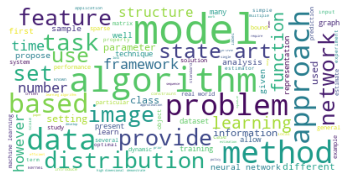

In [79]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Text(0, 0, 'model'),
 Text(0, 0, 'algorithm'),
 Text(0, 0, 'learning'),
 Text(0, 0, 'method'),
 Text(0, 0, 'problem'),
 Text(0, 0, 'data'),
 Text(0, 0, 'approach'),
 Text(0, 0, 'function'),
 Text(0, 0, 'based'),
 Text(0, 0, 'network'),
 Text(0, 0, 'time'),
 Text(0, 0, 'paper'),
 Text(0, 0, 'result'),
 Text(0, 0, 'task'),
 Text(0, 0, 'distribution'),
 Text(0, 0, 'propose'),
 Text(0, 0, 'state'),
 Text(0, 0, 'feature'),
 Text(0, 0, 'image'),
 Text(0, 0, 'performance')]

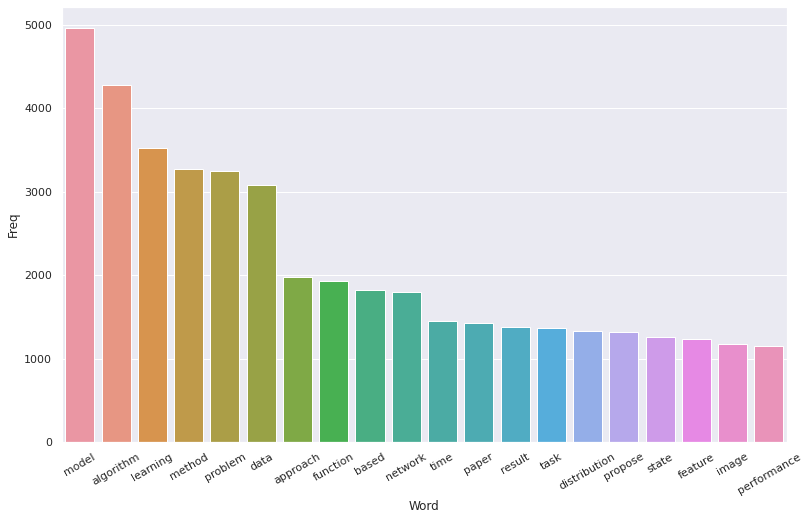

In [82]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                   Bi-gram  Freq
0                state art   701
1           neural network   547
2         machine learning   401
3               real world   364
4       learning algorithm   342
5         high dimensional   320
6              lower bound   252
7                 data set   232
8            paper propose   232
9          graphical model   222
10     experimental result   219
11    optimization problem   215
12           loss function   205
13  reinforcement learning   201
14                low rank   197
15        gradient descent   183
16        learning problem   180
17        gaussian process   179
18     stochastic gradient   170
19             monte carlo   170


[Text(0, 0, 'state art'),
 Text(0, 0, 'neural network'),
 Text(0, 0, 'machine learning'),
 Text(0, 0, 'real world'),
 Text(0, 0, 'learning algorithm'),
 Text(0, 0, 'high dimensional'),
 Text(0, 0, 'lower bound'),
 Text(0, 0, 'data set'),
 Text(0, 0, 'paper propose'),
 Text(0, 0, 'graphical model'),
 Text(0, 0, 'experimental result'),
 Text(0, 0, 'optimization problem'),
 Text(0, 0, 'loss function'),
 Text(0, 0, 'reinforcement learning'),
 Text(0, 0, 'low rank'),
 Text(0, 0, 'gradient descent'),
 Text(0, 0, 'learning problem'),
 Text(0, 0, 'gaussian process'),
 Text(0, 0, 'stochastic gradient'),
 Text(0, 0, 'monte carlo')]

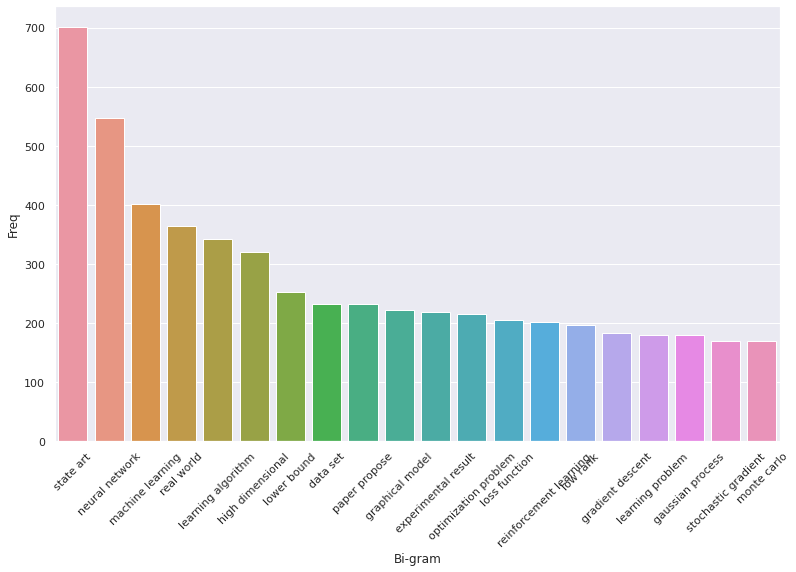

In [84]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                        Tri-gram  Freq
0   convolutional neural network   100
1            deep neural network    94
2          state art performance    82
3    stochastic gradient descent    80
4            real world datasets    76
5               state art method    72
6       recurrent neural network    70
7                real world data    68
8        markov decision process    63
9                low rank matrix    62
10          synthetic real world    61
11            multi armed bandit    60
12         outperforms state art    60
13      semi supervised learning    59
14         latent variable model    55
15            markov chain monte    55
16             chain monte carlo    55
17              state art result    55
18  principal component analysis    50
19   empirical risk minimization    50


[Text(0, 0, 'convolutional neural network'),
 Text(0, 0, 'deep neural network'),
 Text(0, 0, 'state art performance'),
 Text(0, 0, 'stochastic gradient descent'),
 Text(0, 0, 'real world datasets'),
 Text(0, 0, 'state art method'),
 Text(0, 0, 'recurrent neural network'),
 Text(0, 0, 'real world data'),
 Text(0, 0, 'markov decision process'),
 Text(0, 0, 'low rank matrix'),
 Text(0, 0, 'synthetic real world'),
 Text(0, 0, 'multi armed bandit'),
 Text(0, 0, 'outperforms state art'),
 Text(0, 0, 'semi supervised learning'),
 Text(0, 0, 'latent variable model'),
 Text(0, 0, 'markov chain monte'),
 Text(0, 0, 'chain monte carlo'),
 Text(0, 0, 'state art result'),
 Text(0, 0, 'principal component analysis'),
 Text(0, 0, 'empirical risk minimization')]

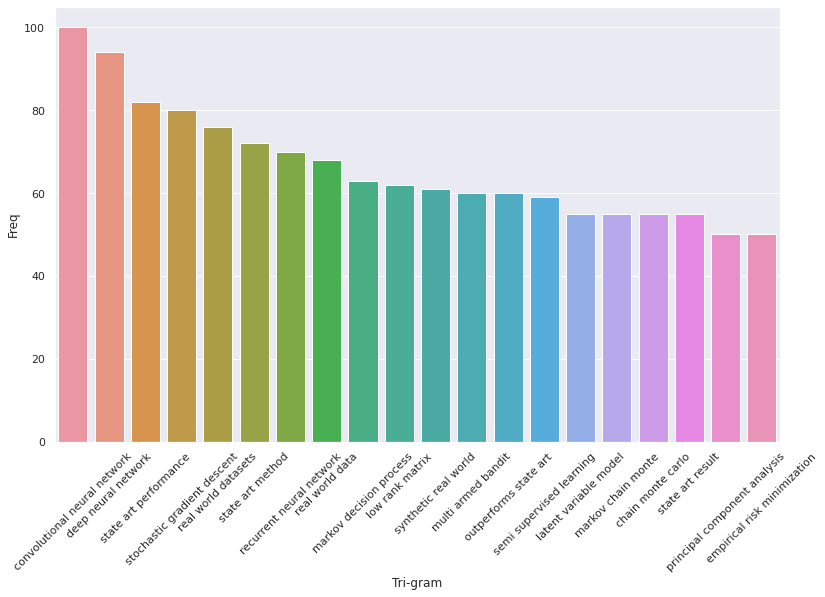

In [85]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[532]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [87]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
problem approximating given probability distribution simpler distribution play important role several area machine learning e g variational inference classification within context consider task learning mixture tree distribution although mixture tree learned minimizing kl divergence em algorithm success depends heavily initialization propose efficient strategy obtaining good initial set tree attempt cover entire observed distribution minimizing alpha divergence alpha infty formulate problem fractional covering framework present convergent sequential algorithm relies solving convex program iteration compared previous method approach result significantly smaller mixture tree provides similar better accuracy demonstrate usefulness approach learning pictorial structure face recognition

Keywords:
tree 0.297
mixture 0.226
alpha 0.215
distribution 0.197
divergence 0.181
